In [4]:
import torchaudio
from src.STFT import ipcSTFT
import matplotlib.pyplot as plt
import torch

stft = ipcSTFT(
    n_fft=512,
    hop_length=128,
    win_length=512
)
def plot_complex_spectrogram(spectrogram, vmax, vmin, axes=None):
    assert len(axes) == 2, "axes must be a list of 2 axes"
    if axes is None:
        fig, axes = plt.subplots(1, 2, figsize=(6, 6))
    if vmax is None:
        vmax = (torch.quantile(spectrogram.real, 0.95), torch.quantile(spectrogram.imag, 0.95))
    if vmin is None:
        vmin = (torch.quantile(spectrogram.real, 0.05), torch.quantile(spectrogram.imag, 0.05))
    axes[0].pcolormesh(spectrogram.real.detach().cpu().numpy(), vmax=vmax[0], vmin=vmin[0])
    axes[0].set_title("Real part")
    axes[1].pcolormesh(spectrogram.imag.detach().cpu().numpy(), vmax=vmax[1], vmin=vmin[1])
    axes[1].set_title("Imaginary part")
    return axes, vmax, vmin

### Toy sample
sin wave: (200, 400, 600, 800, 1000 Hz)

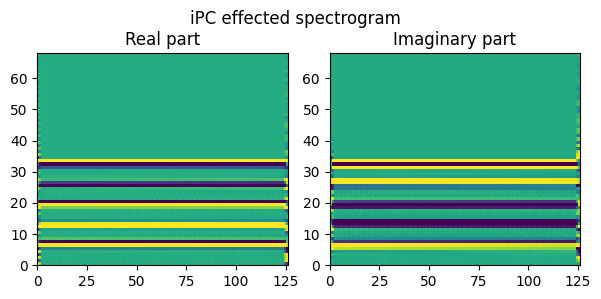

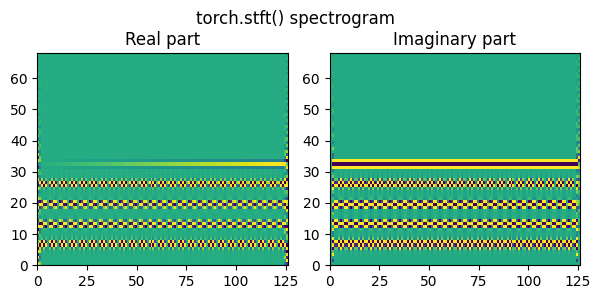

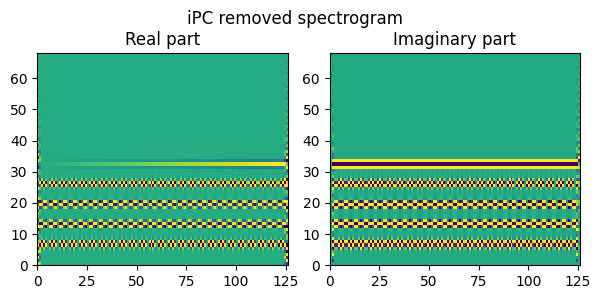

In [6]:
sample_rate = 16000
t = torch.linspace(0, 1, sample_rate)
waveform = torch.sin(2 * torch.pi * 200 * t) + \
              torch.sin(2 * torch.pi * 400 * t) + \
              torch.sin(2 * torch.pi * 600 * t) + \
              torch.sin(2 * torch.pi * 800 * t) + \
              torch.sin(2 * torch.pi * 1000 * t)
waveform = waveform.unsqueeze(0)

# ipc stft
spec, inv_ope = stft.stft(waveform)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
_, vmax, vmin = plot_complex_spectrogram(spec[0,:68], None, None, axes)
fig.tight_layout(rect=[0,0,1,0.96])
fig.suptitle("iPC effected spectrogram")
plt.show()

# torch.stft()
spec_torch = stft._stft_torch(waveform)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
plot_complex_spectrogram(spec_torch[0,:68], vmax, vmin, axes)
fig.tight_layout(rect=[0,0,1,0.96])
fig.suptitle("torch.stft() spectrogram")
plt.show()

# ipc stft with the effect of ipc removed.
spec_delipc = spec * inv_ope
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
plot_complex_spectrogram(spec_delipc[0,:68], vmax, vmin, axes)
fig.tight_layout(rect=[0,0,1,0.96])
fig.suptitle("iPC removed spectrogram")
plt.show()



### Speech sample

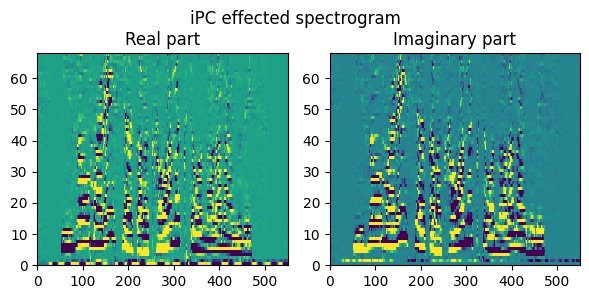

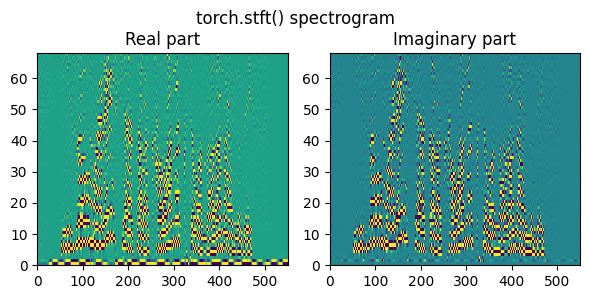

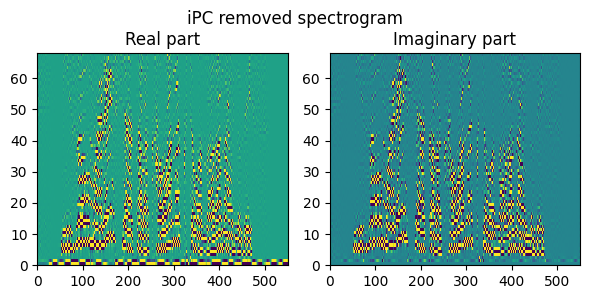

In [7]:
waveform, _ = torchaudio.load("./sample/JSUT_BASIC5000_0001.wav")

# ipc stft
spec, inv_ope = stft.stft(waveform)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
_, vmax, vmin = plot_complex_spectrogram(spec[0,:68], None, None, axes)
fig.tight_layout(rect=[0,0,1,0.96])
fig.suptitle("iPC effected spectrogram")
plt.show()

# torch.stft()
spec_torch = stft._stft_torch(waveform)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
plot_complex_spectrogram(spec_torch[0,:68], vmax, vmin, axes)
fig.tight_layout(rect=[0,0,1,0.96])
fig.suptitle("torch.stft() spectrogram")
plt.show()

# ipc stft with the effect of ipc removed.
spec_delipc = spec * inv_ope
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
plot_complex_spectrogram(spec_delipc[0,:68], vmax, vmin, axes)
fig.tight_layout(rect=[0,0,1,0.96])
fig.suptitle("iPC removed spectrogram")
plt.show()